In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.639765,0.755314,3.186952e-07,0.609437,0.706452,-0.016294,0.597498,0.637997,-0.022611,0.615681,...,0.666558,0.570428,-0.036337,0.657040,0.610261,-0.033995,0.650270,0.641059,-0.026698,R
1,0.623196,0.908713,2.651544e-07,0.581845,0.856825,-0.019461,0.561850,0.773034,-0.028614,0.579799,...,0.648434,0.675566,-0.049296,0.633766,0.724535,-0.047047,0.624668,0.767191,-0.039308,R
2,0.779867,1.009881,2.957027e-07,0.750929,0.969550,-0.022878,0.742842,0.903472,-0.032683,0.767725,...,0.820159,0.852140,-0.040777,0.809331,0.887286,-0.037761,0.796673,0.906534,-0.030816,R
3,0.758835,0.720756,3.528231e-07,0.733148,0.667830,-0.030692,0.729752,0.599133,-0.034122,0.751600,...,0.792331,0.549909,-0.021410,0.787193,0.583421,-0.027907,0.777850,0.603482,-0.027245,R
4,0.575613,0.740290,1.993458e-07,0.539576,0.704666,-0.011757,0.519479,0.637927,-0.016301,0.531195,...,0.586561,0.547208,-0.037568,0.576364,0.588685,-0.032295,0.571046,0.623703,-0.023210,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,0.707238,0.979189,2.398826e-07,0.684959,0.928996,-0.021427,0.688441,0.843447,-0.021892,0.729582,...,0.769939,0.786038,-0.039012,0.758954,0.817521,-0.046369,0.748187,0.851478,-0.049946,W
2595,0.675082,1.028798,2.060695e-07,0.653874,0.971117,-0.022294,0.655983,0.889367,-0.025160,0.698024,...,0.744179,0.844753,-0.044601,0.730146,0.883943,-0.051438,0.718160,0.920066,-0.054873,W
2596,0.654757,0.943864,2.108983e-07,0.628104,0.885308,-0.019376,0.627266,0.796590,-0.019271,0.666183,...,0.715082,0.717790,-0.038300,0.703146,0.754956,-0.043876,0.692563,0.792185,-0.046490,W
2597,0.426733,0.912890,2.968387e-07,0.380202,0.889914,-0.022133,0.340956,0.791439,-0.027363,0.365065,...,0.435210,0.626519,-0.087040,0.419881,0.703160,-0.100236,0.415339,0.770410,-0.105905,W


In [14]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.639765,0.755314,3.186952e-07,0.609437,0.706452,-0.016294,0.597498,0.637997,-0.022611,0.615681,...,0.666558,0.570428,-0.036337,0.657040,0.610261,-0.033995,0.650270,0.641059,-0.026698,R
1,0.623196,0.908713,2.651544e-07,0.581845,0.856825,-0.019461,0.561850,0.773034,-0.028614,0.579799,...,0.648434,0.675566,-0.049296,0.633766,0.724535,-0.047047,0.624668,0.767191,-0.039308,R
2,0.779867,1.009881,2.957027e-07,0.750929,0.969550,-0.022878,0.742842,0.903472,-0.032683,0.767725,...,0.820159,0.852140,-0.040777,0.809331,0.887286,-0.037761,0.796673,0.906534,-0.030816,R
3,0.758835,0.720756,3.528231e-07,0.733148,0.667830,-0.030692,0.729752,0.599133,-0.034122,0.751600,...,0.792331,0.549909,-0.021410,0.787193,0.583421,-0.027907,0.777850,0.603482,-0.027245,R
4,0.575613,0.740290,1.993458e-07,0.539576,0.704666,-0.011757,0.519479,0.637927,-0.016301,0.531195,...,0.586561,0.547208,-0.037568,0.576364,0.588685,-0.032295,0.571046,0.623703,-0.023210,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,0.707238,0.979189,2.398826e-07,0.684959,0.928996,-0.021427,0.688441,0.843447,-0.021892,0.729582,...,0.769939,0.786038,-0.039012,0.758954,0.817521,-0.046369,0.748187,0.851478,-0.049946,W
2595,0.675082,1.028798,2.060695e-07,0.653874,0.971117,-0.022294,0.655983,0.889367,-0.025160,0.698024,...,0.744179,0.844753,-0.044601,0.730146,0.883943,-0.051438,0.718160,0.920066,-0.054873,W
2596,0.654757,0.943864,2.108983e-07,0.628104,0.885308,-0.019376,0.627266,0.796590,-0.019271,0.666183,...,0.715082,0.717790,-0.038300,0.703146,0.754956,-0.043876,0.692563,0.792185,-0.046490,W
2597,0.426733,0.912890,2.968387e-07,0.380202,0.889914,-0.022133,0.340956,0.791439,-0.027363,0.365065,...,0.435210,0.626519,-0.087040,0.419881,0.703160,-0.100236,0.415339,0.770410,-0.105905,W


In [15]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2599, 63)
Labels shape = (2599,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [17]:
y_pred = svm.predict(x_test)
y_pred

array(['F', 'K', 'P', 'U', 'H', 'J', 'X', 'I', 'M', 'K', 'Z', 'Q', 'X',
       'G', 'X', 'U', 'Y', 'C', 'W', 'V', 'A', 'O', 'M', 'M', 'N', 'G',
       'I', 'O', 'N', 'K', 'J', 'X', 'N', 'D', 'A', 'S', 'F', 'T', 'Q',
       'S', 'Q', 'F', 'L', 'M', 'K', 'G', 'G', 'I', 'G', 'M', 'H', 'E',
       'J', 'W', 'P', 'D', 'X', 'V', 'D', 'O', 'H', 'D', 'F', 'O', 'C',
       'X', 'P', 'I', 'Z', 'T', 'D', 'K', 'I', 'A', 'D', 'O', 'H', 'C',
       'O', 'I', 'B', 'S', 'X', 'X', 'U', 'A', 'Z', 'S', 'S', 'D', 'G',
       'R', 'E', 'X', 'Q', 'A', 'W', 'F', 'A', 'D', 'G', 'Q', 'X', 'O',
       'T', 'C', 'M', 'R', 'V', 'K', 'S', 'O', 'Q', 'X', 'Q', 'X', 'H',
       'B', 'P', 'L', 'M', 'H', 'B', 'B', 'H', 'J', 'E', 'P', 'H', 'V',
       'I', 'X', 'N', 'P', 'E', 'K', 'I', 'S', 'W', 'F', 'P', 'R', 'U',
       'S', 'F', 'F', 'C', 'H', 'P', 'R', 'S', 'D', 'T', 'L', 'X', 'N',
       'L', 'C', 'U', 'X', 'Y', 'N', 'J', 'A', 'R', 'H', 'U', 'S', 'B',
       'P', 'V', 'A', 'Y', 'X', 'C', 'D', 'A', 'L', 'T', 'X', 'B

In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8769230769230769, 0.8769230769230769, 0.8769230769230769)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

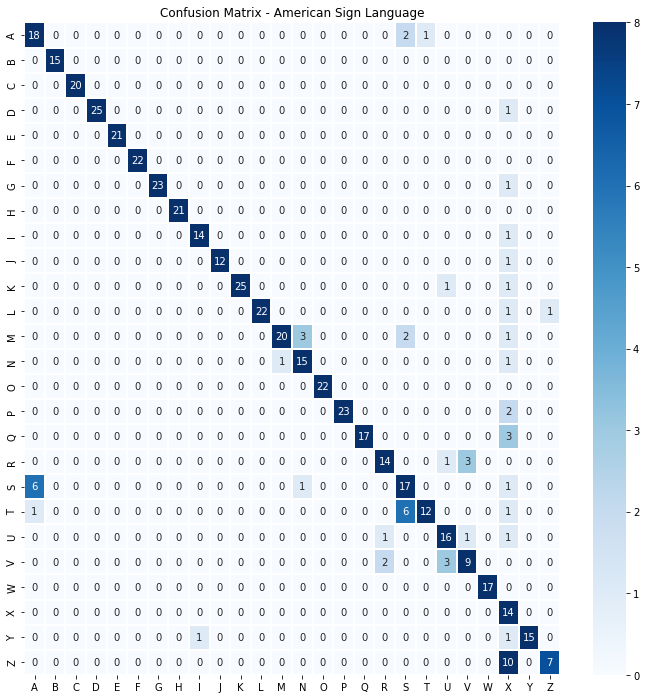

In [19]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [20]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)